## Getting Started
To prepare the LibRealSense Python environment, follow the steps below:

- Download [PyCharm](https://www.jetbrains.com/pycharm/download/#section=windows) integrated development environment
- Download [Python 3.7](https://www.python.org/downloads/release/python-3710/) or later 
- Download [get-pip.py](https://bootstrap.pypa.io/get-pip.py) and run the following commands in PyCharm terminal: 
    - ***python get-pip.py*** &emsp;&emsp;&emsp;&emsp;&nbsp;Pip tool to install Pip Python package
    - ***pip install pyrealsense2*** &emsp;&nbsp;Intel RealSense cross-platform open-source API
    - ***pip install numpy*** &emsp;&emsp;&emsp;&emsp;&nbsp;Fundamental package for scientific computing
    - ***pip install matplotlib*** &emsp;&emsp;&ensp;&nbsp;2D plotting library producing publication quality figures
    - ***pip install opencv-python***&nbsp;&nbsp;OpenCV packages for Python
    <br> 
        some of these packages are not directly used here, but maybe useful in other examples


### This Demo plays back a recording of a RealSense Depth Camera. It is tested on Linux and Windows 10.¶
- No further installation is needed.

### The demo will query sensors in recorded device from this [ROSBag](https://librealsense.intel.com/rs-tests/TestData/bear.bag), then it will display depth and color frames using Pipeline API.
- The output from each code snippet can be seen under it. You can change the code and try different things and then press the play button to the left of each code snippet to run again. 

In [23]:
import os
import numpy as np                        # Fundamental package for scientific computing
import matplotlib.pyplot as plt           # 2D plotting library producing publication quality figures
from IPython.display import clear_output  # Clear the screen
import pyrealsense2 as rs                 # Intel RealSense cross-platform open-source API
print("Environment is Ready")

Environment is Ready


# Creating a Pipeline

The pipeline is a high-level API for streaming and processing frames, abstracting camera configurations and simplifying user interaction with the device and computer vision processing modules. Config is a utility object used by a pipeline.

In [24]:
pipe = rs.pipeline()                      # Create a pipeline
cfg = rs.config()                         # Create a default configuration
print("Pipeline is created")

Pipeline is created


## Find RealSense Devices

In [25]:
print("Creating devices from records..")
cfg.enable_device_from_file(str(os.environ['HOME'])+'//downloads//bear.bag', repeat_playback = True)
device = cfg.resolve(pipe).get_device()
if not device:
    print("Cannot open playback device. Verify that the ROSBag input file is not corrupted")
else:
    print(device.get_info(rs.camera_info.name))
    

Searching for devices in ROSBAG file..
Intel RealSense D435I


## Find Depth and RGB Sensors
Only RGB and Depth sensors are relevant for this demo.

In [21]:
rgb_sensor = depth_sensor = None
                        
print("Available sensors:")
for s in device.sensors:                             
    if s.get_info(rs.camera_info.name) == 'RGB Camera':
        print(" - found RGB sensor")
        rgb_sensor = s                                # Set RGB sensor
    if s.get_info(rs.camera_info.name) == 'Stereo Module':
        depth_sensor = s                              # Set Depth sensor
        print(" - found Depth sensor")

Available sensors:
 - found Depth sensor
 - found RGB sensor


## Displaying Depth and Color Frames

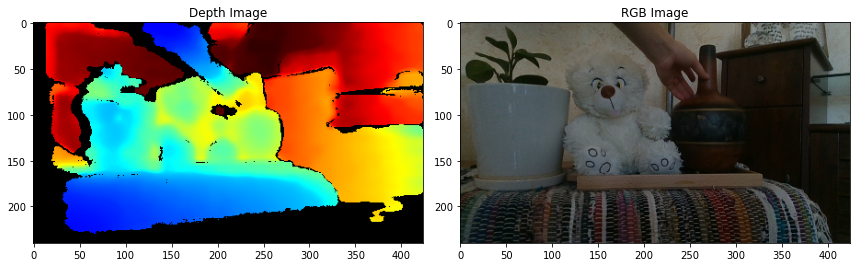

Done!


In [22]:
colorizer = rs.colorizer()                                # Processing block for colorizing the depth information
profile = pipe.start(cfg)                                 # Configure and start the pipeline
device.as_playback().set_real_time( True )                # Set to False to read each frame sequentially

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12,4)) # Show 1 row with 2 columns for Depth and RGB frames
title = ["Depth Image", "RGB Image"]                      # Title for each frame

for _ in range(5):                                        # Increase to display more frames
    frameset = pipe.wait_for_frames()                     # Read frames from the file, packaged as a frameset
    depth_frame = frameset.get_depth_frame()              # Get depth frame
    color_frame = frameset.get_color_frame()              # Get RGB frame

    colorized_streams = []                                # This is what we'll actually display
    colorized_streams.append(np.asanyarray(colorizer.colorize(depth_frame).get_data()))
    colorized_streams.append(np.asanyarray(color_frame.get_data()))
    
    for i, ax in enumerate(axs.flatten()):                # Iterate over all (Depth and RGB) colorized frames
        plt.sca(ax)                                       # Set the current Axes and Figure
        plt.imshow(colorized_streams[i])                  # colorized frame to display
        plt.title(title[i])                               # Add title for each subplot
    clear_output(wait=True)                               # Clear any previous frames from the display
    plt.tight_layout()                                    # Adjusts display size to fit frames
    plt.pause(1)                                          # Make the playback slower so it's noticeable
    
pipe.stop()                                               # Stop the pipeline
print("Done!")